In [1]:
ls ../data/navy/SentencesNAVY/

APR2014.csv      Dec2013.pdf      Jan2014.pdf      NOV2015.pdf
APR2015.pdf      FEB16.pdf        July2014.pdf     NOV2016.pdf
APR2016.pdf      FEB2015.pdf      July2015.pdf     NOV2017.pdf
APR2017.pdf      FEB2017.pdf      Jun2015.pdf      Nov2013.pdf
AUG2014.pdf      Feb2014.pdf      June2014.pdf     OCT2015.pdf
AUG2015.pdf      JAN2013.pdf      MAR2015.pdf      OCT2016.pdf
AUG2016.pdf      JAN2015.pdf      MAR2016.pdf      OCT2017.pdf
AUG2017.pdf      JAN2016.pdf      MAR2017.pdf      Oct2013.pdf
Apr2014.pdf      JAN2017.pdf      MAY2016.pdf      October2014.pdf
Apr2015.csv      JUL2016.pdf      MAY2017.pdf      SEPT2014.pdf
Aug2013.pdf      JUL2017.pdf      Mar2014.pdf      SEPT2015.pdf
DEC14.pdf        JULY2013.pdf     May2014.pdf      SEPT2016.pdf
DEC2016.pdf      JUN2016.pdf      May2015.pdf      SEPT2017.pdf
Dec15.pdf        JUN2017.pdf      NOV14.pdf        Sept2013.pdf


In [2]:
import textract
import sys
sys.path.append('utils/')
import navy_python_scraper
import glob
import random
import re
import pandas as pd

In [4]:
reload(navy_python_scraper)

<module 'navy_python_scraper' from 'utils/navy_python_scraper.py'>

In [5]:
data_dir = '../data/navy/SentencesNAVY/'
df_list = []
court_martial_list = []
for document in glob.glob('../data/navy/SentencesNAVY/*.pdf'):

    # naming...
#     print('----------------------------------')
#     print('processing %s...' % document)
#     print('----------------------------------')
    fp = document
    text = textract.process(fp)
    court_martial=unicode(text, encoding='utf-8').split('At a')[1:]
    court_martial_list += court_martial

    for idx, paragraph in enumerate(court_martial):
        if 'sentencing rehearing' not in paragraph:
            output = {}
            output['Document'] = document
            output['paragraph'] = paragraph
            paragraph= navy_python_scraper.clean_paragraph(paragraph)
            output = navy_python_scraper.get_date(paragraph, output)    
            
            output = navy_python_scraper.get_gender(paragraph, output)
            output = navy_python_scraper.get_rank(paragraph, output)
            output = navy_python_scraper.get_location(paragraph, output)
            output = navy_python_scraper.get_name(paragraph, output)
            output = navy_python_scraper.get_described_offense(paragraph, output)
            output = navy_python_scraper.get_conviction(paragraph, output)
            output = navy_python_scraper.get_sentence(paragraph, output)
            output = navy_python_scraper.cleanup(paragraph, output)
            df_list.append(output)

#     print
#     print

 General Court-Martial in Norfolk, Virginia, an E-5 and an E-4 were tried, jointly, for sexual assault.  On 14 April 2016, the panel of members returned a verdict of not guilty for both Sailors.        
 re-sentencing hearing for a previously held General Court-Martial in San Diego, CA, CTT1 Durville Christopher, USN was sentenced for indecent acts with a child and assault consummated by a battery on a child under the age of 16 years old.  On 25 March 2016, the panel of members sentenced him to be discharged with a Dishonorable Discharge, reduction in rank to paygrade E-1, and confinement for 2 years.                Special Court-Martial    None.   Navy Region Mid-Atlantic            General Court-Martial     
 re-sentencing hearing for a previously held General Court-Martial in Mayport, Florida, ABE2 Alonzo Bass, III, USN was sentenced for violations of a general order and wrongful sexual contact.  On 28 March 2016, the military judge sentenced him to be discharged with a Bad Condu

In [7]:
df = pd.DataFrame(df_list)

In [9]:
df.to_csv('../data/navy/navy-processed-alex.csv', encoding='utf8')

# Marines

In [1]:
fn = '../data/marines/Marine Corps General and Special Court-Martial Dispositions.pdf'

In [8]:
import textract
import pandas as pd 
t = textract.process(fn, process='pdfminer')

In [9]:
t = t.replace('\nAt a','\n\nAt a')

In [10]:
t2 = t.split('\n\n')

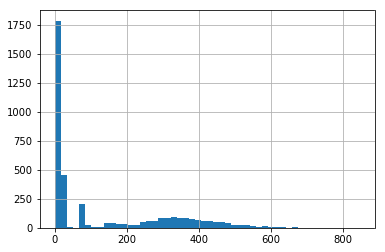

In [11]:
%matplotlib inline
t3 = pd.Series(t2)
t3.apply(lambda x: len(x)).hist(bins=50)

In [12]:
t3[t3.apply(len) < 100].value_counts().head()

Description               139
Unit                       25
HqSvcBn, MCB\nQuantico     13
CLB-3, CLR-3,\n3d MLG      10
2dBn, 2dMar,\n2dMarDiv      8
dtype: int64

In [14]:
import re
date = None
output_lines = []
for line in t2:
    if len(line) > 100:
        # statement
        output_lines.append({
            "date": date,
            "case": line
        })
    else:
        date_match = re.match('\d{1,2}/\d{1,2}/\d\d\d\d', line)
        if date_match:
            # date
            date = date_match.group()
        else:
            # other
            continue

In [15]:
parsed_result_df = pd.DataFrame(output_lines)

In [443]:
parsed_result_df.to_csv('../data/marines/pre_parsed_result_df.csv')

# Parse Fields

In [18]:
import sys
sys.path.append('utils/')
import marines_python_scraper

In [19]:
document = "Marine Corps General and Special Court-Martial Dispositions.pdf"
df_list = []
for date, paragraph in zip(parsed_result_df.date, parsed_result_df.case):
    if 'sentencing rehearing' not in paragraph:
        output = {}
        output['date'] = date
        output['Document'] = document
        output['orig-par'] = paragraph
        paragraph= marines_python_scraper.clean_paragraph(paragraph)
        output['paragraph'] = paragraph
        
        output = marines_python_scraper.get_rank(paragraph, output)
        output = marines_python_scraper.get_location(paragraph, output)
        output = marines_python_scraper.get_name(paragraph, output)
        output = marines_python_scraper.get_described_offense(paragraph, output)
        output = marines_python_scraper.get_conviction(paragraph, output)
        output = marines_python_scraper.get_sentence(paragraph, output)
        output = marines_python_scraper.cleanup(paragraph, output)
        
        if pd.notnull(output):
            df_list.append(output)


At a General Court-Martial Camp Lejeune,  North Carolina,  a sergeant was acquitted by officer and enlisted members of rape of a child,  aggravated sexual contact with a child,  indecent liberty with a child,  and sodomy with a child.
At a Special Court-Martial at Camp Lejeune,  North Carolina,  Lance Corporal S. M. Roach was convicted by a military judge alone of aggravated assault,  assault consummated by battery,  and adultery. The military judge sentence the accused to 194 days confinement,  reduction to E-1,  and a bad-conduct discharge.
no rank..
Court-Martial at Iwakuni,  Japan,  a acquitted by officer and enlisted members of a lawful general order,  abusive sexual assault consummated by a battery.
Court-Martial at Iwakuni,  Japan,  a acquitted by officer and enlisted members of a lawful general order,  abusive sexual assault consummated by a battery.
At a General Court-Martial at Twentynine Palms,  California,  Lance Corporal D. L. Hock was convicted by officer and enlisted mem

In [20]:
pd.DataFrame(df_list).to_csv('../data/marines/marines_parsed.csv', encoding='utf-8')

In [435]:
(pd.DataFrame(df_list)
 .pipe(
     lambda df: df[df['paragraph']
     .apply(lambda x: 'accused to 70 days confinement,  forfeiture of $1, 000' in x)]))['paragraph'].values

array([u'At a Special Court-Martial at Quantico,  Virginia,  Lance MCBQ Corporal J. J. Healy was convicted by a military judge alone of wrongful use and possession of a controlled substance. The military judge sentenced the accused to 70 days confinement,  forfeiture of $1, 000 per month for a period of four months,  reduction to E-1,  and a bad-conduct discharge. The pre-trial agreement had no effect on the sentence.'],
      dtype=object)

# Air Force

In [513]:
t = textract.process(
    '../data/airforce/SentencesAIRFORCE/airforce2010-2015.pdf', 
    method='pdfminer'
)

In [500]:
df_list = []
for case in re.split('United States v.|U.S. v.', t)[1:]:
    output = {}
    chunks = re.split('Base:|Synopsis:|Trial Results:|Adjudged\s+Sentence:|Sentence:', case.replace('\n', ''))
    if len(chunks) == 4:
        (output['Name'],
         output['City'],
         output['Offense'],
         output['Result']
        ) = chunks
    elif len(chunks) == 5:
        (output['Name'],
         output['City'],
         output['Offense'],
         output['Result'],
         output['Sentence']
        ) = chunks
    else:
        print case.replace('\n', '')
    
    df_list.append(output)

In [519]:
summary_df = pd.DataFrame(df_list)

In [508]:
ls utils/

airforce_python_scraper.py   marines_python_scraper.pyc
airforce_python_scraper.pyc  navy_python_scraper.py
marines_python_scraper.py    navy_python_scraper.pyc


In [509]:
import airforce_python_scraper

In [553]:
month_re = (
    'Jan|'
    'Feb|'
    'Mar|'
    'Apr|'
    'May|'
    'Jun|'
    'Jul|'
    'Aug|'
    'Sep|'
    'Oct|'
    'Nov|'
    'Dec'
)

df_list = []
for document in glob.glob('../data/airforce/SentencesAIRFORCE/*')[1:]:
    t = textract.process(document, method='pdfminer')
    for case in re.split('\n\d{1,2}\.', t)[1:]:
        output = {}
        output['Paragraph'] = case
        output['Document'] = document
        fn = document.replace('Court-Martial_Summaries', '')
        month = re.search(month_re, fn).group()
        year = re.search('\d{2,4}', fn).group()[-2:]
        output['Date'] = month + '-' + year
        df_list.append(output)

In [554]:
glob.glob('../data/airforce/SentencesAIRFORCE/*')[1:]

['../data/airforce/SentencesAIRFORCE/April_16.pdf',
 '../data/airforce/SentencesAIRFORCE/CM_Summ_Aug_16.pdf',
 '../data/airforce/SentencesAIRFORCE/CM_Summaries_Feb_17.pdf',
 '../data/airforce/SentencesAIRFORCE/Court-Martial_Summaries_(Apr_17).pdf',
 '../data/airforce/SentencesAIRFORCE/Court-Martial_Summaries_(Dec_16).pdf',
 '../data/airforce/SentencesAIRFORCE/Court-Martial_Summaries_(Jan_17).pdf',
 '../data/airforce/SentencesAIRFORCE/Court-Martial_Summaries_(Jul_17).pdf',
 '../data/airforce/SentencesAIRFORCE/Court-Martial_Summaries_(Jun_17).pdf',
 '../data/airforce/SentencesAIRFORCE/Court-Martial_Summaries_(Mar_17).pdf',
 '../data/airforce/SentencesAIRFORCE/Court-Martial_Summaries_(May_17).pdf',
 '../data/airforce/SentencesAIRFORCE/Court-Martial_Summaries_(Nov_16).pdf',
 '../data/airforce/SentencesAIRFORCE/Court-Martial_Summaries_(Oct_16).pdf',
 '../data/airforce/SentencesAIRFORCE/Court-Martial_Summaries_(Sep16).pdf',
 '../data/airforce/SentencesAIRFORCE/Feb_16.pdf',
 '../data/airforce

In [556]:
df = pd.DataFrame(df_list)

In [759]:
df_list = []
for date, doc, paragraph in zip(df.Date, df.Document, df.Paragraph):
    output = {}
    output['Document'] = doc
    output['Date'] = date
    output['orig-par'] = paragraph
    paragraph= marines_python_scraper.clean_paragraph(paragraph)
    output['paragraph'] = paragraph

    output = airforce_python_scraper.get_rank(paragraph, output)
    output = airforce_python_scraper.get_location(paragraph, output)
    output = airforce_python_scraper.get_name(paragraph, output)
    output = airforce_python_scraper.get_described_offense(paragraph, output)
    output = airforce_python_scraper.get_conviction(paragraph, output)
    output = airforce_python_scraper.get_sentence(paragraph, output)
    output = airforce_python_scraper.cleanup(paragraph, output)

    if pd.notnull(output):
        df_list.append(output)

  At McConnell AFB,  KS,  an enlisted Airman was tried by officer and enlisted  members of sexual assault of a child and sexual abuse of a child.   Special Court-Martial Convictions  


In [760]:
reload(airforce_python_scraper)

<module 'airforce_python_scraper' from 'utils/airforce_python_scraper.pyc'>

In [761]:
for City, Name, Offense, Result, Sentence in zip(summary_df.City, summary_df.Name, summary_df.Offense, summary_df.Result, summary_df.Sentence):
    output = {}
    output['Document'] = 'summary2010-2015.pdf'
    output = airforce_python_scraper.get_date(Result, output)
    output['Rank'] = Name.split()[0]
    output['Name'] = ' '.join(Name.split()[1:])
    
    # get city
    chunks = City.split(',')
    if len(chunks) >= 1:
        output['city'] = chunks[0]
        if len(chunks) >= 2:
            if chunks[1].strip() in airforce_python_scraper.states:
                output['state'] = chunks[1].strip()
                output['country'] = 'U.S.A.'
            else:
                output['country'] = chunks[1].strip()
            if len(chunks) >= 3:
                output['country'] = chunks[2]
    
    output['Allegation'] = Offense
    output['Offense'] = Result
    output = airforce_python_scraper.get_conviction(Result, output)
    if pd.notnull(Sentence):
        output['Sentence'] = Sentence.split('.')[0]
    else:
        output['Sentence'] = Result
    output = airforce_python_scraper.cleanup(paragraph, output)

    if pd.notnull(output):
        df_list.append(output)

In [763]:
pd.DataFrame(df_list).to_csv('../data/airforce/parsed-airforce.csv', encoding='utf-8')

In [611]:
'OH' in airforce_python_scraper.states

True